# ECE 498 DS Mini Project 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats

In [2]:
import seaborn as sns

/anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Task 1: Data Cleaning and Visual Inspection

## 0. Getting Started With the Data

### 1. To make samples more representative of the whole population, thus get more accurate analysis.

In [3]:
ra0 = pd.read_csv('/Users/W/Desktop/20SP/CS498_DS/mp2/Data/RelativeAbundance_HE0.csv')
ra0

,Microbe Name,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
0,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,...,0.004464,0.004636,0.004046,0.005518,0.005073,0.003527,0.005413,0.003140,0.002998,0.004829
1,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,...,0.010603,0.013565,0.012139,0.012875,0.013294,0.014107,0.012694,0.013082,0.008244,0.010401
2,Actinobacteria_Actinobacteria_Acidimicrobiales...,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,...,0.003906,0.002919,0.004782,0.006070,0.003498,0.004408,0.004853,0.004012,0.004310,0.005758
3,Actinobacteria_Actinobacteria_Actinomycetales_...,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,...,0.005394,0.004979,0.004598,0.005518,0.005597,0.004761,0.004293,0.005233,0.004497,0.005386
4,Actinobacteria_Actinobacteria_Actinomycetales_...,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,...,0.004092,0.003777,0.004782,0.004598,0.003848,0.004585,0.003360,0.004186,0.004684,0.002043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Tenericutes_Mollicutes_Anaeroplasmatales_Anaer...,0.004792,0.003983,0.004976,0.004285,0.003985,0.003963,0.003429,0.005458,0.005154,...,0.004464,0.005666,0.004782,0.005518,0.003848,0.005466,0.005973,0.004186,0.006933,0.005386
145,Tenericutes_Mollicutes_Haloplasmatales_Halopla...,0.004976,0.004345,0.004792,0.007499,0.004332,0.003274,0.004286,0.004930,0.003951,...,0.003720,0.004636,0.006805,0.003678,0.005947,0.004585,0.003547,0.004710,0.005059,0.005201
146,Tenericutes_Mollicutes_Mycoplasmatales_Mycopla...,0.013638,0.010139,0.011611,0.010891,0.009184,0.009478,0.013544,0.014261,0.012541,...,0.010417,0.013565,0.010116,0.011219,0.012944,0.011638,0.011200,0.010291,0.009743,0.014673
147,Thermodesulfobacteria_Thermodesulfobacteria_Th...,0.003870,0.003802,0.004423,0.003571,0.004159,0.004825,0.004972,0.003345,0.004810,...,0.005766,0.005151,0.003862,0.005334,0.004898,0.003879,0.004107,0.005058,0.003935,0.001857


### 2. 

In [4]:
print('{} samples were analyzed'.format(ra0.shape[1] - 1))

764 samples were analyzed


### 3. 

In [5]:
print('{} microbes were identified'.format(ra0.shape[0]))

149 microbes were identified


## 1. Bayesian Network for Quality Control

### a. Joint Probability Factorization
$\text{P(Quality,Contamination,Lab Time Before Processing, Storage Temp, Collection Method)} = \text{P(Quality | Contamination, Lab Time Before Processing) P(Contamination|Storage Temp, Collection Method) P(Storage Temp) P(Collection Method) P(Lab Time Before Processing)}$

### b. Parameters Required

In [6]:
print('The number of parameters needed: ', (2-1)*2*2 +1 +(2-1)*2*2 +1 +1)

The number of parameters needed:  11


### c. Constructing Probability Tables

In [7]:
qc =pd.read_csv('/Users/W/Desktop/20SP/CS498_DS/mp2/Data/QualityControl.csv')
qc

,strtmp,coll,labtime,cont,qual
0,cold,nurse,short,low,good
1,cold,nurse,short,low,good
2,cold,nurse,short,low,bad
3,cold,nurse,short,high,good
4,cold,nurse,short,low,good
...,...,...,...,...,...
4995,cold,nurse,short,high,good
4996,cold,nurse,short,low,good
4997,cold,nurse,long,low,good
4998,cold,nurse,short,low,bad


In [8]:
#P(Q|C,LT)·P(LT)·P(C|ST,CM)·P(ST)·P(CM)

In [9]:
temp1 = pd.crosstab([qc['cont'],qc['labtime']],qc['qual'],margins=False)
temp1['row sum'] = temp1.sum(axis=1)
temp1.apply(lambda x:x/temp1['row sum'])

qual               bad      good  row sum
cont labtime                             
high long     0.966102  0.033898      1.0
     short    0.064257  0.935743      1.0
low  long     0.080997  0.919003      1.0
     short    0.042907  0.957093      1.0

In [10]:
# Conditional probabilities table: P(con|strtmp,coll,labtime)
temp2 = pd.crosstab([qc['strtmp'],qc['coll']],qc['cont'],margins=False)
temp2['row sum'] = temp2.sum(axis=1)
temp2.apply(lambda x:x/temp2['row sum'] )

cont                high       low  row sum
strtmp coll                                
cold   nurse    0.043983  0.956017      1.0
       patient  0.076577  0.923423      1.0
cool   nurse    0.088435  0.911565      1.0
       patient  0.838235  0.161765      1.0

In [11]:
temp3 = pd.DataFrame(qc.groupby(['strtmp']).size())
total = temp3.sum(axis=0)
temp3.apply(lambda x: x/total[0])

,0
strtmp,
cold,0.8982
cool,0.1018


In [12]:
temp4 = pd.DataFrame(qc.groupby(['labtime']).size())
total = temp4.sum(axis=0)
temp4.apply(lambda x: x/total[0])

,0
labtime,
long,0.2044
short,0.7956


In [13]:
temp5 = pd.DataFrame(qc.groupby(['coll']).size())
total = temp5.sum(axis=0)
temp5.apply(lambda x: x/total[0])

,0
coll,
nurse,0.8976
patient,0.1024


### d. Final Probability Tables

In [14]:
# Conditional probabilities table: P(quality|strtmp,coll,labtime)
temp6 = pd.crosstab([qc['strtmp'],qc['coll'],qc['labtime']],qc['qual'],margins=False)
temp6['row sum'] = temp6.sum(axis=1)
temp6.apply(lambda x:x/temp6['row sum'] )

qual                         bad      good  row sum
strtmp coll    labtime                             
cold   nurse   long     0.112038  0.887962      1.0
               short    0.044888  0.955112      1.0
       patient long     0.137931  0.862069      1.0
               short    0.056022  0.943978      1.0
cool   nurse   long     0.177215  0.822785      1.0
               short    0.027624  0.972376      1.0
       patient long     0.882353  0.117647      1.0
               short    0.039216  0.960784      1.0

### e. Cleaning the dataset

According to above calculations, and by comparing $\text{P(good|strtmp,coll,labtime)}  and  $\{P(bad|strtmp,coll,labtime)}
only $\text{P(bad|cool,patient,long)} > P(good|cool,patient,long), which means we need to drop records conducted under **cool,patient,long** condatins.

In [15]:
HE0 = pd.read_csv('/Users/W/Desktop/20SP/CS498_DS/mp2/Data/BayesInferenceHE0.csv')
HE0

,SampleName,strtmp,coll,labtime
0,HE0Sample_0,cold,nurse,short
1,HE0Sample_1,cold,nurse,short
2,HE0Sample_2,cold,nurse,short
3,HE0Sample_3,cold,nurse,short
4,HE0Sample_4,cold,nurse,short
...,...,...,...,...
759,HE0Sample_759,cool,patient,long
760,HE0Sample_760,cool,patient,long
761,HE0Sample_761,cool,patient,long
762,HE0Sample_762,cool,patient,long


In [16]:
bad_records_0 = HE0[(HE0['strtmp']=='cool')&(HE0['coll']=='patient')&(HE0['labtime']=='long')]
bad_records_0

,SampleName,strtmp,coll,labtime
699,HE0Sample_699,cool,patient,long
700,HE0Sample_700,cool,patient,long
701,HE0Sample_701,cool,patient,long
702,HE0Sample_702,cool,patient,long
703,HE0Sample_703,cool,patient,long
...,...,...,...,...
759,HE0Sample_759,cool,patient,long
760,HE0Sample_760,cool,patient,long
761,HE0Sample_761,cool,patient,long
762,HE0Sample_762,cool,patient,long


In [17]:
HE0 = HE0.drop(list(bad_records_0.index))
HE0.shape

(699, 4)

In [18]:
HE1 = pd.read_csv('/Users/W/Desktop/20SP/CS498_DS/mp2/Data/BayesInferenceHE1.csv')
HE1

,SampleName,strtmp,coll,labtime
0,HE1Sample_0,cold,nurse,short
1,HE1Sample_1,cold,nurse,short
2,HE1Sample_2,cold,nurse,short
3,HE1Sample_3,cold,nurse,short
4,HE1Sample_4,cold,nurse,short
...,...,...,...,...
759,HE1Sample_759,cool,patient,long
760,HE1Sample_760,cool,patient,long
761,HE1Sample_761,cool,patient,long
762,HE1Sample_762,cool,patient,long


In [19]:
bad_records_1 = HE1[(HE1['strtmp']=='cool')&(HE1['coll']=='patient')&(HE1['labtime']=='long')]
bad_records_1

,SampleName,strtmp,coll,labtime
699,HE1Sample_699,cool,patient,long
700,HE1Sample_700,cool,patient,long
701,HE1Sample_701,cool,patient,long
702,HE1Sample_702,cool,patient,long
703,HE1Sample_703,cool,patient,long
...,...,...,...,...
759,HE1Sample_759,cool,patient,long
760,HE1Sample_760,cool,patient,long
761,HE1Sample_761,cool,patient,long
762,HE1Sample_762,cool,patient,long


In [20]:
HE1 = HE1.drop(list(bad_records_1.index))
HE1.shape

(699, 4)

## 2. Data Standardization

### 1. Verify Relative Abundance

In [21]:
ra1 = pd.read_csv('/Users/W/Desktop/20SP/CS498_DS/mp2/Data/RelativeAbundance_HE1.csv')
ra1

,Microbe Name,HE1Sample_0,HE1Sample_1,HE1Sample_2,HE1Sample_3,HE1Sample_4,HE1Sample_5,HE1Sample_6,HE1Sample_7,HE1Sample_8,...,HE1Sample_754,HE1Sample_755,HE1Sample_756,HE1Sample_757,HE1Sample_758,HE1Sample_759,HE1Sample_760,HE1Sample_761,HE1Sample_762,HE1Sample_763
0,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...,0.004864,0.004041,0.005630,0.005046,0.005041,0.005278,0.004005,0.003700,0.004295,...,0.004154,0.004178,0.003416,0.004565,0.004000,0.004509,0.005419,0.007286,0.004056,0.005797
1,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.011985,0.012124,0.010732,0.012074,0.009001,0.012559,0.013234,0.011284,0.011391,...,0.012463,0.012709,0.011104,0.011414,0.011478,0.007935,0.015906,0.009341,0.009956,0.007202
2,Actinobacteria_Actinobacteria_Acidimicrobiales...,0.005211,0.003866,0.004926,0.004505,0.005401,0.005461,0.005050,0.003330,0.003922,...,0.003808,0.005571,0.004100,0.004390,0.005217,0.003968,0.003146,0.004110,0.004240,0.004391
3,Actinobacteria_Actinobacteria_Actinomycetales_...,0.003995,0.003866,0.004046,0.005406,0.003600,0.006189,0.003308,0.004255,0.004482,...,0.003981,0.003830,0.004783,0.004214,0.005565,0.003968,0.004195,0.005044,0.004609,0.004567
4,Actinobacteria_Actinobacteria_Actinomycetales_...,0.002953,0.003514,0.004574,0.005046,0.003420,0.004186,0.004701,0.004624,0.003361,...,0.003116,0.003656,0.003758,0.004917,0.005043,0.003787,0.004020,0.003363,0.005531,0.006499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Tenericutes_Mollicutes_Anaeroplasmatales_Anaer...,0.005211,0.004920,0.004750,0.004505,0.004320,0.004004,0.004701,0.005734,0.003922,...,0.003116,0.003656,0.003758,0.003512,0.003130,0.003968,0.005593,0.003363,0.003134,0.003864
145,Tenericutes_Mollicutes_Haloplasmatales_Halopla...,0.002953,0.004744,0.002463,0.005226,0.003960,0.004186,0.003657,0.004070,0.004482,...,0.004847,0.004178,0.005466,0.004390,0.004696,0.003968,0.004195,0.002989,0.004240,0.003337
146,Tenericutes_Mollicutes_Mycoplasmatales_Mycopla...,0.012507,0.009840,0.010204,0.010993,0.011161,0.009829,0.012711,0.012394,0.007656,...,0.008482,0.013579,0.008883,0.011589,0.011826,0.008476,0.013634,0.013077,0.013827,0.011593
147,Thermodesulfobacteria_Thermodesulfobacteria_Th...,0.005906,0.004217,0.005102,0.004505,0.003420,0.006189,0.004179,0.004070,0.004482,...,0.007097,0.003830,0.004100,0.005795,0.002609,0.005591,0.004545,0.005044,0.004240,0.004216


In [22]:
import decimal

https://docs.python.org/2/library/decimal.html

In [23]:
df_temp = ra1.iloc[:,1:].agg(['sum']) 
df_temp.astype('float64')

,HE1Sample_0,HE1Sample_1,HE1Sample_2,HE1Sample_3,HE1Sample_4,HE1Sample_5,HE1Sample_6,HE1Sample_7,HE1Sample_8,HE1Sample_9,...,HE1Sample_754,HE1Sample_755,HE1Sample_756,HE1Sample_757,HE1Sample_758,HE1Sample_759,HE1Sample_760,HE1Sample_761,HE1Sample_762,HE1Sample_763
sum,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
df_temp = df_temp.apply(lambda x : decimal.Decimal(float(x)))
df_temp

HE1Sample_0                                                      1
HE1Sample_1                                                      1
HE1Sample_2      0.99999999999999988897769753748434595763683319...
HE1Sample_3                                                      1
HE1Sample_4                                                      1
                                       ...                        
HE1Sample_759    0.99999999999999988897769753748434595763683319...
HE1Sample_760                                                    1
HE1Sample_761                                                    1
HE1Sample_762                                                    1
HE1Sample_763                                                    1
Length: 764, dtype: object

In [25]:
dirty_index = []
for i in range(len(df_temp)):
    if df_temp[i] <= 1-10e-10 or df_temp[i] >= 1+10e-10:
        dirty_index.append(i)
dirty_index

[]

* We have verified that all the smaples follow constrains(sum=1).

### 2. Discussion on Relative Abundance Data


* **Benefits**:   
Using relative abundance data can produce less errors and can provide overall scope of the data. We can have a better understanding of what percent each microbe takes among all the microbes, and analyze all at the same time.
* **Drawbacks**:   
By using the relative abundance data, the actual value of the data would be discarded, which may have brought influence to the research. For example, if there are 30000 microbe A and 30000 microbe B, the relative abundance data would be as same as the situation where there are only 3 microbe A and 3 microbe B. In other words, abundance data helps the research focus more on the relationships among microbes and the research object, while discarding the influence brought by extreme absolute data values.


## 3. Visual Inspection

In [26]:
ra0 = ra0.set_index('Microbe Name')

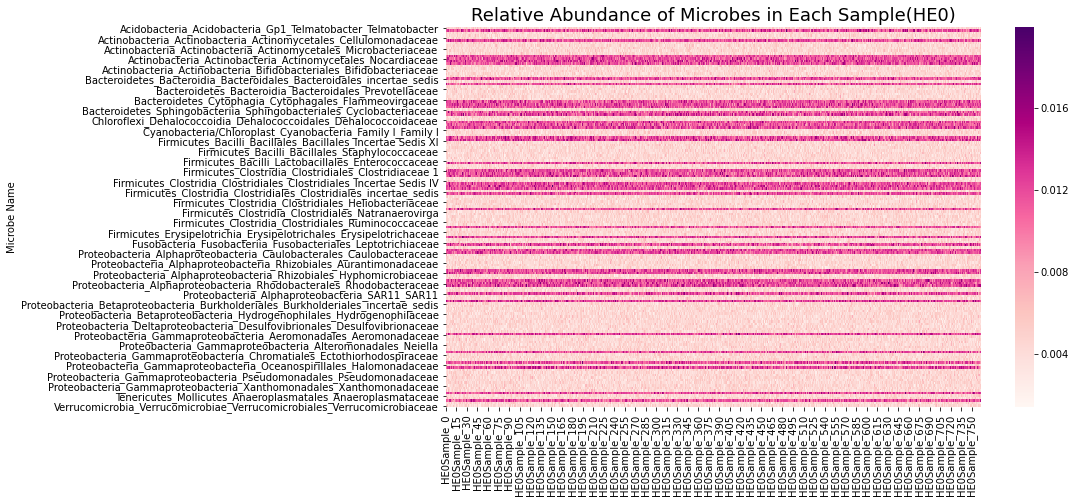

In [27]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Relative Abundance of Microbes in Each Sample(HE0)', fontsize=18)
sns.heatmap(ra0, cmap='RdPu')
plt.show()
#plt.savefig('heatmap1.pdf')

In [28]:
ra1 = ra1.set_index('Microbe Name')

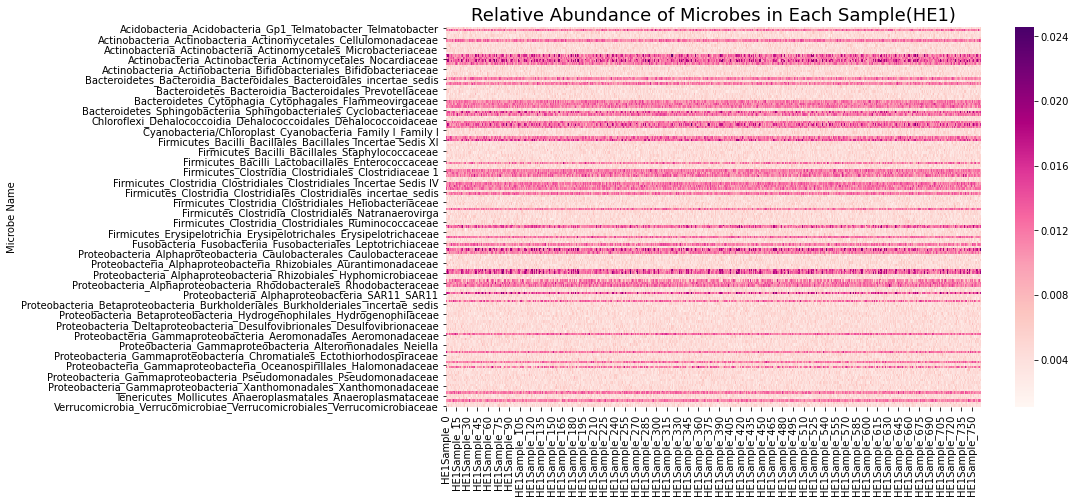

In [29]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Relative Abundance of Microbes in Each Sample(HE1)', fontsize=18)
sns.heatmap(ra1, cmap='RdPu')
plt.show()
#plt.savefig('filename.png', bbox_inches='tight')

# Task 2: Statistical Analysis

## 1. Kolmogorov-Smirnov (KS) Test

### a. p-value for Two-Sample KS Test

In [30]:
ra_joint = ra0.join(ra1)
ra_joint

,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,HE0Sample_9,...,HE1Sample_754,HE1Sample_755,HE1Sample_756,HE1Sample_757,HE1Sample_758,HE1Sample_759,HE1Sample_760,HE1Sample_761,HE1Sample_762,HE1Sample_763
Microbe Name,,,,,,,,,,,,,,,,,,,,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,0.004429,...,0.004154,0.004178,0.003416,0.004565,0.004000,0.004509,0.005419,0.007286,0.004056,0.005797
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,0.011160,...,0.012463,0.012709,0.011104,0.011414,0.011478,0.007935,0.015906,0.009341,0.009956,0.007202
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,0.003366,...,0.003808,0.005571,0.004100,0.004390,0.005217,0.003968,0.003146,0.004110,0.004240,0.004391
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,0.004429,...,0.003981,0.003830,0.004783,0.004214,0.005565,0.003968,0.004195,0.005044,0.004609,0.004567
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,0.004252,...,0.003116,0.003656,0.003758,0.004917,0.005043,0.003787,0.004020,0.003363,0.005531,0.006499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,0.004792,0.003983,0.004976,0.004285,0.003985,0.003963,0.003429,0.005458,0.005154,0.004783,...,0.003116,0.003656,0.003758,0.003512,0.003130,0.003968,0.005593,0.003363,0.003134,0.003864
Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,0.004976,0.004345,0.004792,0.007499,0.004332,0.003274,0.004286,0.004930,0.003951,0.004606,...,0.004847,0.004178,0.005466,0.004390,0.004696,0.003968,0.004195,0.002989,0.004240,0.003337
Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,0.013638,0.010139,0.011611,0.010891,0.009184,0.009478,0.013544,0.014261,0.012541,0.009743,...,0.008482,0.013579,0.008883,0.011589,0.011826,0.008476,0.013634,0.013077,0.013827,0.011593


In [31]:
ks_stats = []
for i in range(ra_joint.shape[0]):
    ks_stats.append(list(stats.ks_2samp(ra_joint.iloc[i,:764],ra_joint.iloc[i,764:]))[1])
ra_joint['ks_stats'] = ks_stats

In [32]:
ra_joint['ks_stats']   #p-value

Microbe Name
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter                                       0.177747
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3                                                           0.002248
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae                                  0.086320
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae                                    0.909664
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae                                   0.726977
                                                                                                    ...   
Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae                                       0.399356
Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae                                           0.221336
Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae                                           0.013030
Thermodesulfobacteria_Th

### b. Null Hypothesis of the KS Test in our Context
In our context, take the **Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter** microbe as an example, the null hypothesis of KS Test would be:
*  The relative abundance of this microbe in 764 HE0 patients, and that in other 764 HE1 patients, are drawn from the same continuous distribution.  

### c. Number of Genes with Significantly Altered Expression at Various Alpha Values

In [33]:
def count_sig(alpha, p_list):
    count = 0
    for p in p_list:
        if p < alpha:
            count += 1
    #print('The number of microbes with significantly althered at alpha={} is {}'.format(alpha,count))
    return count

In [34]:
alpha_list = [0.1,0.05,0.01,0.005,0.001]
count_list = []
for i in range(len(alpha_list)):
    count_list.append(count_sig(alpha_list[i],ra_joint['ks_stats']))
count_list

[48, 36, 27, 24, 20]

In [35]:
table = pd.DataFrame(data=np.ones([5,2]), columns=['alpha','count'])
table['alpha'] = alpha_list
table['count'] = count_list
table

,alpha,count
0,0.100,48
1,0.050,36
2,0.010,27
3,0.005,24
4,0.001,20


## 2. Multiple Testing

### a. P-value
A p-value of 0.05 denotes that the probability is 0.05 that test results are due to chance, under the null hypothesis that microbes are not altered significantly in two samples.

### b. P-value Distribution
When the null hypothesis is true, if it takes the form H0:theta = theta0, and the underlying random variable is continuous, then the probability distribution of the p-value is **uniform on the interval (0,1)**

### c. Expected Number of Significant p-values

In [36]:
count_list_exp = []
for i in range(len(alpha_list)):
    count_list_exp.append(alpha_list[i]*len(ra_joint['ks_stats']))
table['count_expected'] = count_list_exp
table

,alpha,count,count_expected
0,0.100,48,14.900
1,0.050,36,7.450
2,0.010,27,1.490
3,0.005,24,0.745
4,0.001,20,0.149


### d. Q-Q plot of p-values

#### i. 

In [37]:
expected_p = np.random.uniform(0,1,ra_joint['ks_stats'].size)
observed_p = np.array(ra_joint['ks_stats'])

#### ii. 

In [38]:
expected_p_log = -np.log10(expected_p)
observed_p_log = -np.log10(observed_p)

#### iii. 

In [39]:
expected_p_log = np.sort(expected_p_log)
observed_p_log = np.sort(observed_p_log)

#### iv. 

In [40]:
p_pairs = list(zip(expected_p_log,observed_p_log))
p_pairs[0]

(0.0013474177678667756, 0.00019825070399178145)

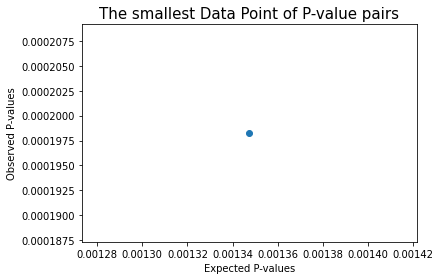

In [41]:
plt.figsize=(10,10)
plt.scatter(p_pairs[0][0],p_pairs[0][1])
plt.title('The smallest Data Point of P-value pairs', fontsize=15)
plt.xlabel('Expected P-values')
plt.ylabel('Observed P-values')
plt.show()

#### v. 

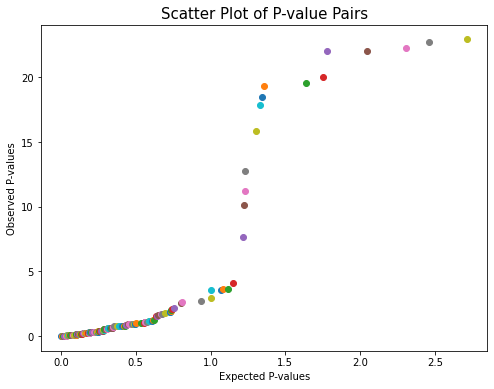

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_title('Scatter Plot of P-value Pairs', fontsize=15)
ax.set_xlabel('Expected P-values')
ax.set_ylabel('Observed P-values')
for pair in p_pairs:
    ax.scatter(pair[0],pair[1])

plt.show()

#### vi. 

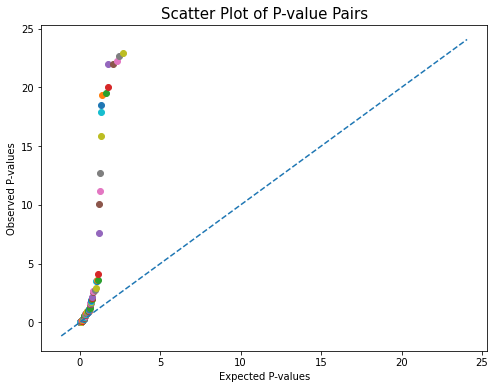

In [43]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_title('Scatter Plot of P-value Pairs', fontsize=15)
ax.set_xlabel('Expected P-values')
ax.set_ylabel('Observed P-values')
for pair in p_pairs:
    ax.scatter(pair[0],pair[1])

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes 
    ]
ax.plot(lims,lims, '--')
plt.show()

### e. Follow-up Questions

#### i. 
After taking the -log10() of the p-values, the tendency towards extreme large data could be reduced.
Values are often converted to log values to reduce the dispersion of data set, e.g. If there are set of values between 1 to 100 log values would fall only in the range of 0 to 2. That helps in getting linear response and well data fitting.

#### ii.  
Because the Q-Q plot does not align with x=y, p-values are not uniformly distributed and we can reject the null hypothesis.

# Task 3: Dimensionality Reduction and Clustering

## 1. PCA

### a. Performing PCA

In [44]:
ra0_t = ra0.T
ra0_t

Microbe Name,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae,Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae,Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae,...,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Sinobacteraceae,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Xanthomonadaceae,Proteobacteria_Zetaproteobacteria_Mariprofundales_Mariprofundaceae,Spirochaetes_Spirochaetia_Spirochaetales_Brachyspiraceae,Synergistetes_Synergistia_Synergistales_Synergistaceae,Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,Thermodesulfobacteria_Thermodesulfobacteria_Thermodesulfobacteriales_Thermodesulfobacteriaceae,Verrucomicrobia_Verrucomicrobiae_Verrucomicrobiales_Verrucomicrobiaceae
HE0Sample_0,0.004239,0.013269,0.003502,0.003870,0.004976,0.012532,0.004055,0.004055,0.004792,0.005898,...,0.003317,0.006635,0.005529,0.004792,0.013269,0.004792,0.004976,0.013638,0.003870,0.005345
HE0Sample_1,0.004345,0.012312,0.005251,0.005794,0.003802,0.010683,0.004345,0.006156,0.004527,0.005251,...,0.005251,0.005251,0.005613,0.005794,0.010139,0.003983,0.004345,0.010139,0.003802,0.004164
HE0Sample_2,0.004423,0.011611,0.006082,0.005345,0.004239,0.011426,0.003502,0.004792,0.005345,0.004239,...,0.004607,0.004055,0.003686,0.006819,0.012532,0.004976,0.004792,0.011611,0.004423,0.006450
HE0Sample_3,0.004463,0.013033,0.003749,0.004106,0.004285,0.011427,0.003571,0.004999,0.004642,0.004821,...,0.004106,0.005178,0.004642,0.003392,0.012676,0.004285,0.007499,0.010891,0.003571,0.006427
HE0Sample_4,0.005372,0.013689,0.004332,0.002946,0.005198,0.014902,0.003639,0.004159,0.003812,0.003292,...,0.005025,0.001733,0.005718,0.006758,0.013343,0.003985,0.004332,0.009184,0.004159,0.003466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HE0Sample_759,0.003527,0.014107,0.004408,0.004761,0.004585,0.010580,0.003350,0.004408,0.006524,0.004937,...,0.004761,0.004056,0.003350,0.004937,0.010933,0.005466,0.004585,0.011638,0.003879,0.003703
HE0Sample_760,0.005413,0.012694,0.004853,0.004293,0.003360,0.014747,0.005040,0.004107,0.004107,0.004667,...,0.005787,0.003920,0.005040,0.005973,0.013067,0.005973,0.003547,0.011200,0.004107,0.005787
HE0Sample_761,0.003140,0.013082,0.004012,0.005233,0.004186,0.010466,0.004535,0.003837,0.004884,0.004535,...,0.005233,0.003489,0.004884,0.003663,0.013431,0.004186,0.004710,0.010291,0.005058,0.003663
HE0Sample_762,0.002998,0.008244,0.004310,0.004497,0.004684,0.011055,0.003185,0.003560,0.004310,0.005621,...,0.005621,0.004310,0.004310,0.004684,0.013678,0.006933,0.005059,0.009743,0.003935,0.005434


In [45]:
# standardize the data
from sklearn.preprocessing import StandardScaler

ra0_scale = pd.DataFrame(StandardScaler().fit_transform(ra0_t))
ra0_scale

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,-0.335448,0.699616,-1.099219,-0.669633,0.552589,0.431977,-0.470711,-0.473767,0.305769,1.506091,...,-1.309407,2.378277,1.105207,0.283709,0.901466,0.374831,0.496101,1.324613,-0.654053,0.982558
1,-0.217684,0.183620,0.771535,1.444541,-0.744913,-0.766029,-0.150011,1.758605,0.019327,0.816897,...,0.836293,0.844178,1.196216,1.315483,-1.060891,-0.499116,-0.191844,-0.821049,-0.727373,-0.311555
2,-0.131876,-0.194438,1.660391,0.950736,-0.262319,-0.284233,-1.080217,0.309325,0.902908,-0.261413,...,0.122331,-0.481818,-0.892579,2.370789,0.439287,0.574072,0.295037,0.081309,-0.057666,2.195042
3,-0.087317,0.572378,-0.834323,-0.410095,-0.211360,-0.284191,-1.004006,0.529600,0.144073,0.358470,...,-0.433719,0.763122,0.143801,-1.157067,0.529602,-0.173055,3.248222,-0.360166,-0.977073,2.169822
4,0.915861,0.925837,-0.211126,-1.685663,0.798396,1.966908,-0.928941,-0.363108,-0.752200,-1.270039,...,0.585873,-3.055459,1.310420,2.307895,0.947315,-0.496844,-0.206528,-1.407087,-0.342890,-1.077781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,-1.122060,1.150997,-0.129424,0.309381,0.120024,-0.832389,-1.246987,-0.097894,2.177105,0.482969,...,0.292818,-0.480522,-1.256345,0.433663,-0.563473,1.104198,0.069189,0.098111,-0.644202,-0.817423
760,0.962024,0.389267,0.346597,-0.204537,-1.233722,1.866492,0.615789,-0.418291,-0.434012,0.194605,...,1.431204,-0.630852,0.575348,1.500319,0.774554,1.652397,-1.063211,-0.170424,-0.398925,1.467408
761,-1.549530,0.598666,-0.553534,0.827894,-0.320421,-0.906498,0.059095,-0.704405,0.405414,0.054324,...,0.816420,-1.109199,0.406104,-0.878328,1.002762,-0.279713,0.205394,-0.727904,0.627595,-0.861334
762,-1.706136,-2.008996,-0.235156,0.019069,0.230069,-0.524893,-1.428958,-0.999056,-0.215025,1.211562,...,1.247326,-0.199170,-0.216619,0.173075,1.157669,2.689415,0.586631,-1.063982,-0.584435,1.080286


In [46]:
from sklearn.decomposition import PCA

pca0 = PCA(n_components='mle', svd_solver='full')
p_comp0 = pca0.fit_transform(ra0_scale)
p_df0 = pd.DataFrame(data = p_comp0)
p_df0

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,2.343650,0.528185,-2.757749,3.261561,0.775660,0.034164,2.051784,-3.297521,0.063333,0.522644,...,-0.196959,0.495360,-0.171926,-0.617087,0.779371,-0.568847,0.075171,0.541146,1.286347,0.742153
1,4.231830,-0.334492,0.064032,-2.271087,-2.429417,-1.035697,-0.593385,0.185810,-0.205627,0.579345,...,0.779510,-0.351371,-0.048887,-0.077863,-0.296451,-0.378522,0.640137,0.548398,0.132482,0.263192
2,3.196846,2.147945,0.302655,0.177046,1.385942,2.166309,0.128318,-2.003397,-0.229837,-0.800524,...,0.163412,0.547151,-0.121424,-0.211669,-0.101176,-0.865590,0.316393,0.148273,-0.064614,1.542450
3,3.064885,-0.517695,-0.736228,1.315443,0.895553,-0.885364,-0.684529,-1.288085,-0.692465,1.358910,...,-0.161020,0.196509,-0.197257,-0.486476,-0.805342,-0.736033,-0.217729,0.988118,-1.110651,0.388593
4,-2.065985,0.139607,4.103851,1.134481,-2.990637,0.612424,0.934457,1.209800,0.582592,-0.938856,...,-0.142427,-1.654660,0.898579,-0.064035,-0.145906,-0.045838,-1.065934,0.396591,0.022635,-0.604696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,-3.872553,-0.262756,0.169314,-2.299590,-1.280509,-0.815669,0.907056,0.359752,1.485997,-0.912282,...,-0.419281,1.084458,0.345538,0.204840,-1.326853,0.738554,0.012953,0.353565,-0.798538,0.470831
760,3.703485,0.749400,-0.048969,-1.040946,-0.059091,-3.076339,-0.735987,-0.314342,-1.501058,-1.305092,...,0.241575,-0.705407,-1.130254,-0.901430,-1.029571,0.730116,-0.425213,-0.221006,1.033653,0.114298
761,-2.425200,-1.772251,-0.552620,1.212150,0.689160,0.840634,-0.166231,0.767915,-0.734835,0.288630,...,0.541635,-0.860315,-0.237609,-0.170452,-0.640065,0.082732,-0.009882,0.343306,0.500242,-0.445445
762,1.587542,-3.223487,0.567462,1.073548,0.613494,1.525736,-0.185950,0.018366,2.029800,-0.472357,...,-0.552995,0.503793,0.267230,-0.180150,0.185616,0.416020,-1.384668,1.533327,-0.755808,-0.532489


In [47]:
# for HE1 Samples
ra1_t = ra1.T
ra1_scale = pd.DataFrame(StandardScaler().fit_transform(ra1_t))

pca1 = PCA(n_components='mle', svd_solver='full')
                                                        
p_comp1 = pca1.fit_transform(ra1_scale)
p_df1 = pd.DataFrame(data = p_comp1)

pca1 = PCA(n_components='mle', svd_solver='full')
p_comp1 = pca1.fit_transform(ra1_scale)
p_df1 = pd.DataFrame(data = p_comp1)
p_df1

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-2.467201,-0.949835,-2.978468,0.520254,-1.010166,-0.130163,0.384110,0.900587,-2.557167,2.784077,...,0.510550,-0.585319,0.716380,-0.352037,-0.405560,0.473843,-0.566114,-0.141960,-0.030114,-0.084771
1,5.306864,-1.520821,-0.010486,-0.007576,0.654007,0.143263,1.417691,-0.236801,-0.297673,0.047302,...,-0.268596,0.269217,-0.419474,0.109235,-0.162760,-0.042093,0.328594,0.322812,-0.431724,0.383607
2,-2.609843,-1.380172,-0.513569,-1.657356,0.957144,1.515480,0.491609,-0.691688,-2.690274,-0.285312,...,-0.355816,-0.541940,0.376859,0.555394,0.096383,-0.184424,-0.018585,-0.263510,-0.529150,-0.308459
3,5.983950,-0.706689,2.326755,-1.736842,-1.525988,-0.910633,-0.425621,-2.248560,-0.340914,0.444015,...,-0.953172,-0.105253,0.035271,-0.218380,0.088834,0.302504,0.510991,-0.452811,-0.535784,-0.523779
4,6.133193,0.344261,-2.499237,-0.843159,-0.640322,-1.392340,0.887386,-0.698006,-1.276417,0.272682,...,0.537463,0.802582,-0.228656,-0.478005,-0.447086,0.468252,0.430000,0.232508,-1.088651,0.325797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,4.998629,-0.747834,-0.958294,0.881324,-1.156900,-0.304589,1.747634,1.395321,-0.769937,0.866850,...,-0.133871,-0.576953,-0.103373,0.943183,-0.057823,-0.057565,-0.377399,0.651923,0.374772,-0.319469
760,-2.015079,-0.947616,1.843722,2.858263,-1.746646,-1.183269,0.242700,-0.911240,1.610705,0.119674,...,0.899885,0.153780,0.275868,-0.197165,-0.176261,0.741708,0.212576,-0.063392,-0.365637,-0.385955
761,-0.691320,3.315083,-1.872320,-0.205011,-0.864008,1.337370,1.674003,-1.003650,0.017740,-2.726119,...,0.052233,0.753896,-0.332924,0.144666,-1.008256,0.121590,0.350250,0.488961,-0.211678,-0.568178
762,-1.787517,2.046926,0.510049,-1.234512,-1.222086,0.869005,0.222196,-0.617974,-1.393876,-1.114106,...,0.296496,0.007205,-1.010084,-0.329226,-0.391953,-0.478728,0.106325,0.239852,0.571391,0.201011



### b. Ordering Components

In [48]:
variance_fraction0 = list(pca0.explained_variance_ratio_)
variance_fraction0

[0.04768353666307517,
 0.013307451212333635,
 0.013225335667221184,
 0.012622814298302162,
 0.012308197685506528,
 0.012160849244729668,
 0.012018261174059058,
 0.011708074849236005,
 0.01153202311939862,
 0.01143226959472098,
 0.011357748057551534,
 0.011196057972428043,
 0.011089490882950736,
 0.01107014476216183,
 0.010910412801162771,
 0.01074938118625598,
 0.01064104872760108,
 0.010549279019652835,
 0.010509099153283312,
 0.010394417180183283,
 0.010321166932327768,
 0.01028113935568269,
 0.010113225579224496,
 0.01004304834380197,
 0.009910349806011588,
 0.009722179706325539,
 0.009574965057618776,
 0.009504096440774296,
 0.00939936047475234,
 0.009322735146022474,
 0.00923922953720799,
 0.009101822777879184,
 0.008982454415754366,
 0.008931472023803576,
 0.008890749487399244,
 0.008845452085645711,
 0.008746475901478553,
 0.008617340275753504,
 0.008533974343352195,
 0.008424023069169945,
 0.008412208802701276,
 0.008334056781796453,
 0.008312229170331715,
 0.00816242251051741,

In [49]:
variance_fraction1 = list(pca1.explained_variance_ratio_)

In [50]:
p_no = list(range(1,len(variance_fraction0)+1))

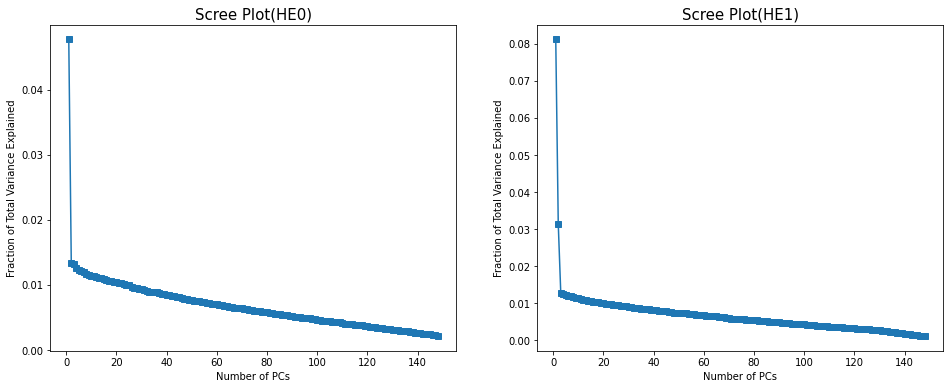

In [51]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(p_no,variance_fraction0,marker='s')
ax[0].set_title('Scree Plot(HE0)',fontsize=15)
ax[0].set_xlabel('Number of PCs')
ax[0].set_ylabel('Fraction of Total Variance Explained')

ax[1].plot(p_no,variance_fraction1,marker='s')
ax[1].set_title('Scree Plot(HE1)',fontsize=15)
ax[1].set_xlabel('Number of PCs')
ax[1].set_ylabel('Fraction of Total Variance Explained')
plt.show()

In [52]:
sum_acc = 0
for i in range(len(variance_fraction0)):
    sum_acc += variance_fraction0[i]
    if sum_acc >= 0.3:
        print('For HE0 dataset, {} principal components are needed in order to explain 30% of the total variance'.format(i))
        break

For HE0 dataset, 23 principal components are needed in order to explain 30% of the total variance


In [53]:
sum_acc = 0
for i in range(len(variance_fraction1)):
    sum_acc += variance_fraction1[i]
    if sum_acc >= 0.3:
        print('For HE1 dataset, {} principal components are needed in order to explain 30% of the total variance'.format(i))
        break

For HE1 dataset, 18 principal components are needed in order to explain 30% of the total variance


### c. Scatter Plot of Microbe Abundance

In [54]:
pca0_2 = PCA(n_components=2)
p_comp0_2 = pca0_2.fit_transform(ra0_scale)
p_df0_2 = pd.DataFrame(data=p_comp0_2, columns = ['principal component 1', 'principal component 2'])
p_df0_2

,principal component 1,principal component 2
0,2.343618,-0.626031
1,4.231908,-0.598280
2,3.196893,1.820040
3,3.064801,-0.049986
4,-2.065967,0.544367
...,...,...
759,-3.872351,0.141328
760,3.703664,1.418449
761,-2.425151,-1.799522
762,1.587534,-3.054898


In [55]:
pca1_2 = PCA(n_components=2)
p_comp1_2 = pca1_2.fit_transform(ra1_scale)
p_df1_2 = pd.DataFrame(data=p_comp1_2, columns = ['principal component 1', 'principal component 2'])
p_df1_2

,principal component 1,principal component 2
0,-2.467197,-0.950743
1,5.306863,-1.521412
2,-2.609843,-1.379134
3,5.983950,-0.705752
4,6.133193,0.346143
...,...,...
759,4.998628,-0.748313
760,-2.015079,-0.947905
761,-0.691321,3.316777
762,-1.787516,2.048224


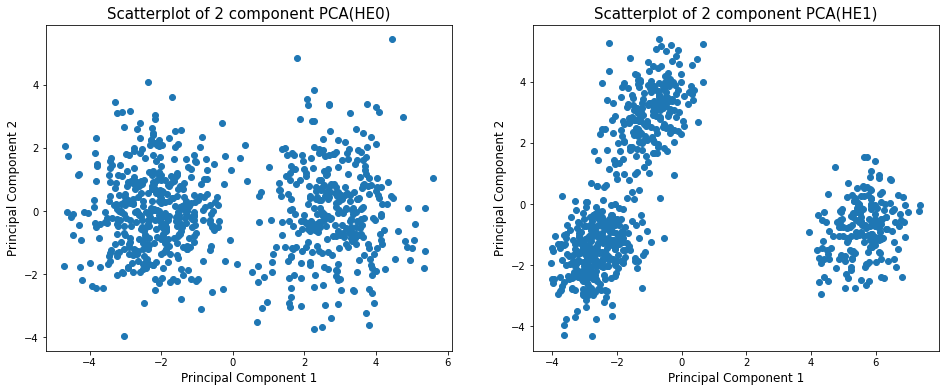

In [56]:
fig, ax = plt.subplots(1,2,figsize = (16,6))
ax[0].set_xlabel('Principal Component 1', fontsize = 12)
ax[0].set_ylabel('Principal Component 2', fontsize = 12)
ax[0].set_title('Scatterplot of 2 component PCA(HE0)', fontsize = 15)
ax[0].scatter(p_df0_2['principal component 1'], p_df0_2['principal component 2'])

ax[1].set_xlabel('Principal Component 1', fontsize = 12)
ax[1].set_ylabel('Principal Component 2', fontsize = 12)
ax[1].set_title('Scatterplot of 2 component PCA(HE1)', fontsize = 15)
ax[1].scatter(p_df1_2['principal component 1'], p_df1_2['principal component 2'])

plt.show()

**Observations:** After applying PCA for dimension reduction, the data points are more readable, and we can observe some patterns obviously, that there are several groups of data staying close to each other.

## 2. t-SNE

### a. Performing t-SNE

In [57]:
from sklearn.manifold import TSNE

tsne0 = TSNE(n_components=2,random_state=42)
tsne0_df = pd.DataFrame(tsne0.fit_transform(ra0_scale),columns=['tsne-2d-one','tsne-2d-two'])
tsne0_df

,tsne-2d-one,tsne-2d-two
0,11.801050,-21.266430
1,6.768495,-8.765873
2,19.368061,-17.084141
3,6.856873,-17.119659
4,-17.190710,-9.241463
...,...,...
759,-5.492362,-5.160990
760,9.033213,15.405736
761,-2.173090,6.919114
762,-15.352372,-7.366682


In [58]:
tsne1 = TSNE(n_components=2,random_state=42)
tsne1_df = pd.DataFrame(tsne1.fit_transform(ra1_scale),columns=['tsne-2d-one','tsne-2d-two'])
tsne1_df

,tsne-2d-one,tsne-2d-two
0,12.067321,11.499169
1,-18.980618,-29.773989
2,8.874582,15.693258
3,-23.068424,-33.200954
4,-27.470751,-27.735632
...,...,...
759,-24.554159,-22.417299
760,1.892346,3.005052
761,0.849127,12.466094
762,-2.169293,-0.292478


In [59]:
def tsne_scatter_plot(df0,df1):
    fig, ax = plt.subplots(1,2,figsize = (16,6))
    ax[0].set_xlabel('tsne-2d-one', fontsize = 12)
    ax[0].set_ylabel('tsne-2d-two', fontsize = 12)
    ax[0].set_title('Scatterplot of 2 component t-SNE(HE0)', fontsize = 15)
    ax[0].scatter(df0['tsne-2d-one'], df0['tsne-2d-two'])

    ax[1].set_xlabel('tsne-2d-one', fontsize = 12)
    ax[1].set_ylabel('tsne-2d-two', fontsize = 12)
    ax[1].set_title('Scatterplot of 2 component t-SNE(HE1)', fontsize = 15)
    ax[1].scatter(df1['tsne-2d-one'], df1['tsne-2d-two'])

    plt.show()

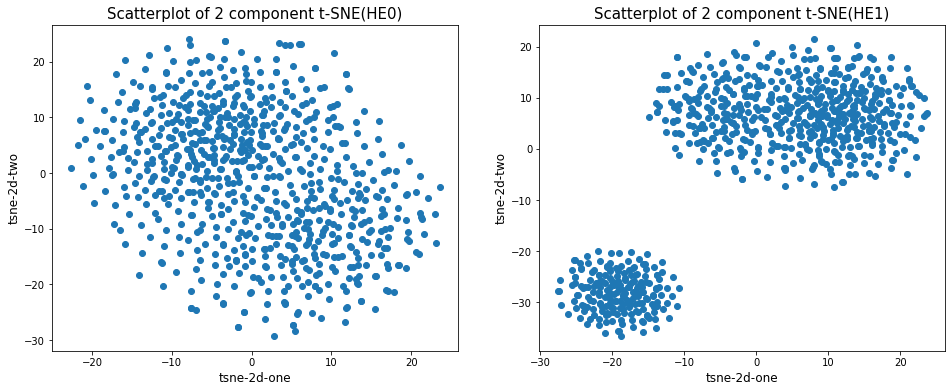

In [60]:
tsne_scatter_plot(tsne0_df,tsne1_df)

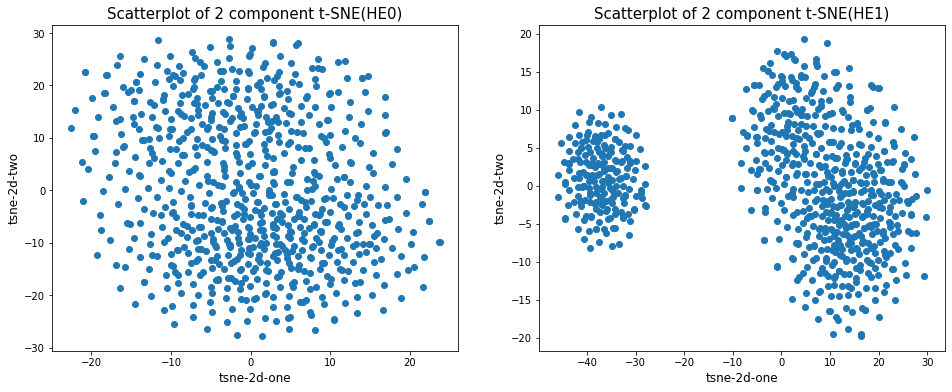

In [61]:
tsne062 = TSNE(n_components=2,random_state=62)
tsne062_df = pd.DataFrame(tsne062.fit_transform(ra0_scale),columns=['tsne-2d-one','tsne-2d-two'])
tsne162 = TSNE(n_components=2,random_state=62)
tsne162_df = pd.DataFrame(tsne162.fit_transform(ra1_scale),columns=['tsne-2d-one','tsne-2d-two'])

tsne_scatter_plot(tsne062_df,tsne162_df)

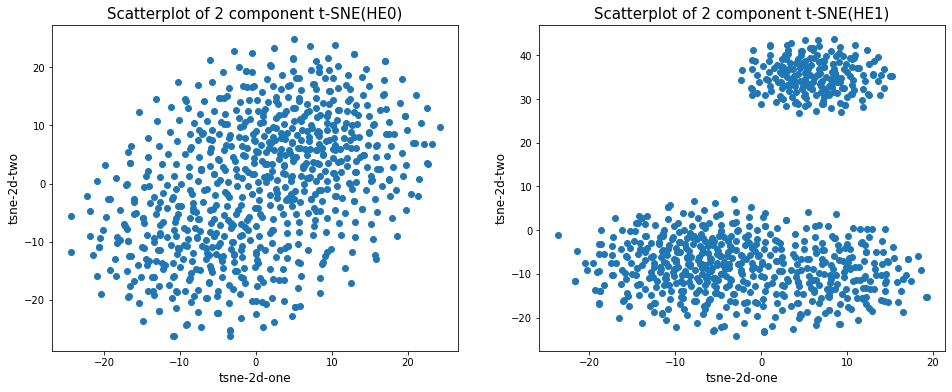

In [62]:
tsne082 = TSNE(n_components=2,random_state=82)
tsne082_df = pd.DataFrame(tsne082.fit_transform(ra0_scale),columns=['tsne-2d-one','tsne-2d-two'])
tsne182 = TSNE(n_components=2,random_state=82)
tsne182_df = pd.DataFrame(tsne182.fit_transform(ra1_scale),columns=['tsne-2d-one','tsne-2d-two'])

tsne_scatter_plot(tsne082_df,tsne182_df)

**Observations:** With different values of random_state, the values that each data point projects onto the axis would be different, changing positions of the whole data points. However, the number of groups of closer data points still remains the same.

### b. Comparing with PCA

**Similarity:** Both PCA and t-SNE help reduce the dimensions of datasets.Both PCA and t-SNE results have clusters for our samples. 

**Difference:** PCA results have more separate and obvious clusters for both samples, while t-SNE results don’t have clearly identifiable clusters for HE0 sample. 


## 3. Clustering

### a. K-Means

In [63]:
from sklearn.cluster import KMeans

In [64]:
# using elbow method to determine the optimal number of clusters
def find_n_clusters(df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(range(1, 11), wcss)
    ax.set_title('Elbow Method')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('WCSS')
    plt.show()

In [65]:
def kmeans_cluster(df,n_cluster):
    kmeans = KMeans(n_cluster)
    kmeans.fit(df)
    y_kmeans = kmeans.predict(df)
    
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
    # plot the centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5)
    plt.title('K-Means Clusters')
    plt.xlabel('1st PC')
    plt.ylabel('2nd PC')
    plt.show()  

To decide the optimal number of clusters, we calculate the WCSS value, which is the sum of squares of the distances of each data point in all clusters to their respective centroids. Then we plot the line plot of WCSS values responding to each number of clusters, as the followings:

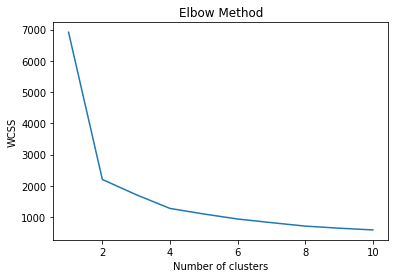

In [66]:
find_n_clusters(p_df0_2) # the optimal number is 2

For HE0 sample, WCSS gets reduced very sharply when there are 2 clusters, although it gets smaller when there are 4 or even larger number of clusters, the change is not obvious or meaningful, so we choose 2 clusters for HE0 sample. 

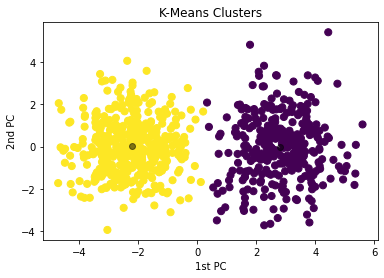

In [67]:
kmeans_cluster(p_df0_2,2)

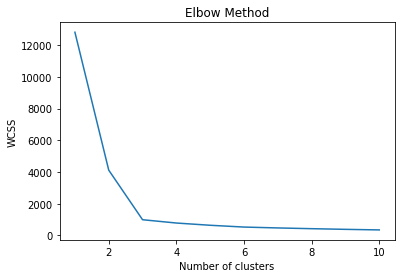

In [68]:
find_n_clusters(p_df1_2)  # the optimal number is 3

Likely, we choose 3 clusters for HE1 sample.

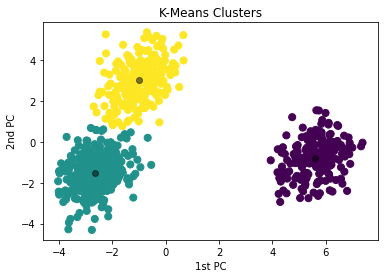

In [69]:
kmeans_cluster(p_df1_2,3)

### b. GMM

In [70]:
from sklearn.mixture import GaussianMixture

In [71]:
# find the optimal number of components by applying BIC/AIC criteria
# the built-in method GMM estimator could compute both
def find_n_gmm(df):
    n_comp = np.arange(1, 11)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df)
              for n in n_comp]

    plt.plot(n_comp, [m.bic(df) for m in models], label='BIC')
    plt.plot(n_comp, [m.aic(df) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('Number of Components')
    plt.ylabel('Criteria Value')
    plt.title('BIC/AIC line plot')
    plt.show()
# the optimal number is the one that minimizes the BIC/AIC

In [72]:
def plot_gmm(df,n_comp):
    gmm = GaussianMixture(n_components=n_comp).fit(df)
    labels = gmm.predict(df)
    plt.scatter(df['principal component 1'], df['principal component 2'], c=labels, s=40, cmap='viridis')
    plt.title('GMM Clusters')
    plt.xlabel('1st PC')
    plt.ylabel('2nd PC')
    plt.show()

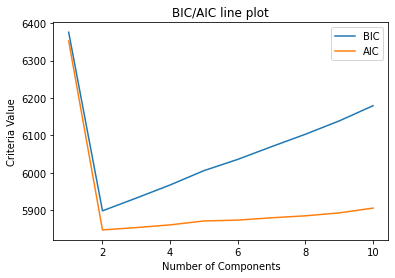

In [73]:
find_n_gmm(p_df0_2)  # the optimal number of components for HE0 sample: 2

For HE0 samples, both the criteria values reached to the minimum when the number of components is 2, so we got two clusters by using Gaussian Mixture Models. Similarly, we got 3 clusters for HE1 sample.

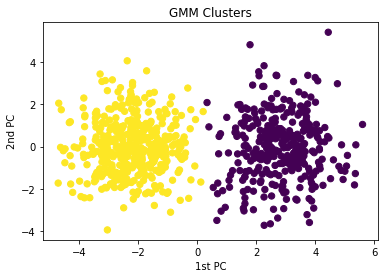

In [74]:
plot_gmm(p_df0_2,2)

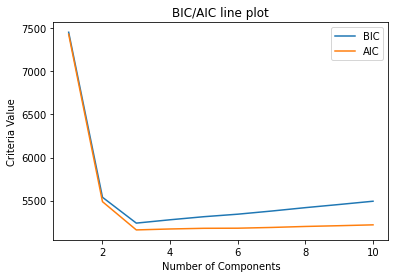

In [75]:
find_n_gmm(p_df1_2)  # the optimal number of components for HE1 sample: 3

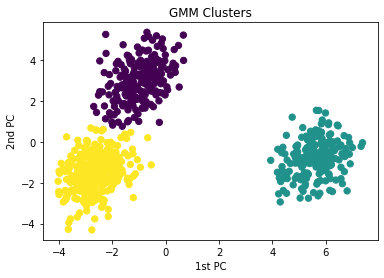

In [76]:
plot_gmm(p_df1_2,3)

### c. Single and Complete Linkage Hierarchical

In [77]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [78]:
# Using the dendrogram to find the optimal numbers of clusters
def plot_dendrogram(df,linkage):
    dendrogram = sch.dendrogram(sch.linkage(df, method=linkage))
    plt.title('Dendrogram')
    plt.xticks(rotation=90)
    plt.ylabel('Euclidean distances')
    plt.show()

In [79]:
def plot_hierarchial(df,n,linkage):
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage=linkage)
    model.fit(df)
    labels = model.labels_
    plt.scatter(df['principal component 1'], df['principal component 2'], c=labels, s=40, cmap='viridis')
    plt.title('Hierarchical Clusters')
    plt.xlabel('1st PC')
    plt.ylabel('2nd PC')
    plt.show()

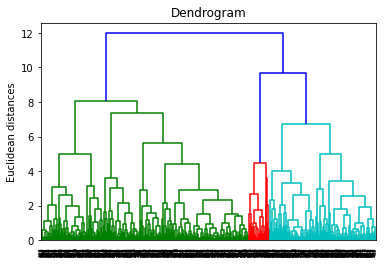

In [80]:
plot_dendrogram(p_df0_2,'complete')

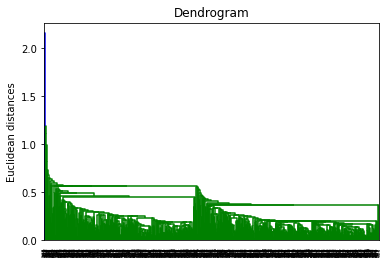

In [81]:
plot_dendrogram(p_df0_2,'single')

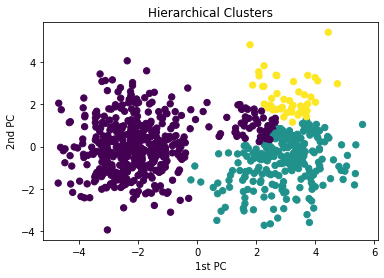

In [82]:
plot_hierarchial(p_df0_2,3,'complete')

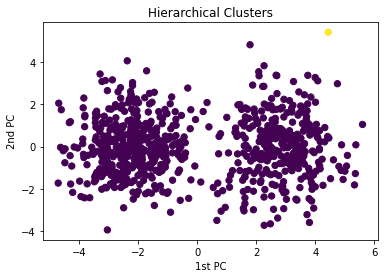

In [83]:
plot_hierarchial(p_df0_2,2,'single')

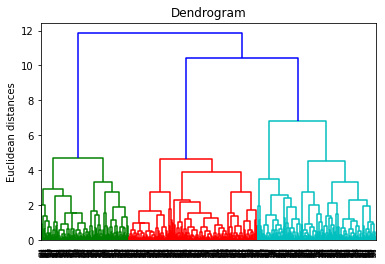

In [84]:
plot_dendrogram(p_df1_2,'complete')

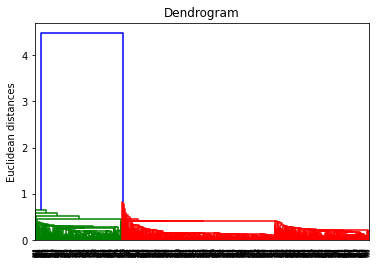

In [85]:
plot_dendrogram(p_df1_2,'single')

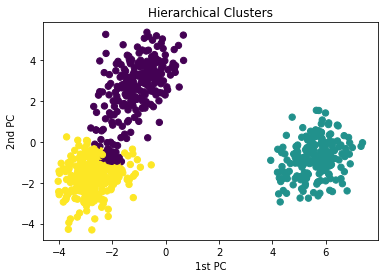

In [86]:
plot_hierarchial(p_df1_2,3,'complete')

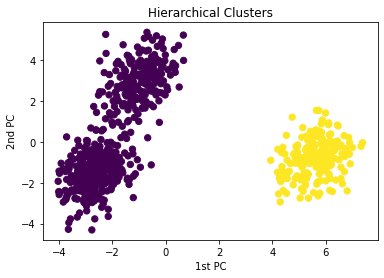

In [87]:
plot_hierarchial(p_df1_2,2,'single')

### d. Single vs Complete Link Hierarchical Clustering

Discuss the differences between the single and complete linkage hierarchical clustering methods. Do you see any major differences in the generated clusters? Is there anything about our data which affects if we see a difference between the two linkage options?  

1. With single linkage method, the distance between two clusters is represented by the distance of the closest pair of data objects belonging to different clusters, while for complete linkage, the it is the distance of the farthest pair of data objects.

2. The single linkage and complete linkage do generated different clusters. For HE0 samples, although both the single and complete linkage methods classify two clusters, there is only one data point belongs to the second cluster according to the scatterplot, and most belongs to the first one, which means the clustering effect is not well.  However, the complete linkage method performs much better, for HE1 samples, the dendrogram is more readable and balanced.  

3. Single-link hierarchical clustering is so sensitive to noise and outliers, so if there are outliers in our datapoint, the clustering performance would not be too good.


### e. Comparing Clustering Techniques

Compare your results for different clustering methods and interpret them. Select the results from one of the clusters for the following analyses. Pay close attention to the generated clusters when choosing which results to use.  

* K-means clustering and Gaussian mixture model clustering produce very similar clustering results, but are a little different than results got from hierarchical clustering methods. However, K-means is a hard-clustering whereas GMMs is a soft-clustering method  
* Single linkage hierarchical clustering has 2 clusters for both samples, but one clustering result is not satisfying, because it classifies only one point to one cluster, and the rest for another one, maybe because this method is sensitive to outliers. As for complete linkage hierarchical clustering, it prefer spherical clusters, robust to outliers, and and tend to break large clusters, we got 3 obvious clusters.   
* We decided to select the soft clustering method Gaussian mixture model clustering.

### f. What do Clusters Represent

In context, what do the clusters you have found represent? What are some factors which could account for this type of clustering pattern?  
1. Clusters we grouped through clustering algorithms represent groups of samples having similar microbe components with similar abundance (indicated by relative abundance of each microbe).  
2. GMM could be easily influenced by starting points, and could converge to the local maximum rather than global one. 

### g. Deciding on Number of Clusters

Based on your process for deciding the number of clusters to partition the data into, what situations or factors might result in your decision being inaccurate? 
* The accuracy as well as complexity of K-Means is based on certain criteria which includes the selection of initial centroid and the strategy used in performing calculations from each data object to different cluster centers. 

# Task 4: Interpreting Results

## 1. Identify Microbes with Altered Abundance Levels

### a. Determine if each HE1 Subpopulation shows altered abundance levels

In [88]:
gmm0 = GaussianMixture(2).fit(ra0_t)
labels0 = gmm0.predict(ra0_t) # classify samples into 2 classes by applying GMM 
ra0_t['labels'] = labels0
ra0_t

Microbe Name,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae,Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae,Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae,...,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Xanthomonadaceae,Proteobacteria_Zetaproteobacteria_Mariprofundales_Mariprofundaceae,Spirochaetes_Spirochaetia_Spirochaetales_Brachyspiraceae,Synergistetes_Synergistia_Synergistales_Synergistaceae,Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,Thermodesulfobacteria_Thermodesulfobacteria_Thermodesulfobacteriales_Thermodesulfobacteriaceae,Verrucomicrobia_Verrucomicrobiae_Verrucomicrobiales_Verrucomicrobiaceae,labels
HE0Sample_0,0.004239,0.013269,0.003502,0.003870,0.004976,0.012532,0.004055,0.004055,0.004792,0.005898,...,0.006635,0.005529,0.004792,0.013269,0.004792,0.004976,0.013638,0.003870,0.005345,1
HE0Sample_1,0.004345,0.012312,0.005251,0.005794,0.003802,0.010683,0.004345,0.006156,0.004527,0.005251,...,0.005251,0.005613,0.005794,0.010139,0.003983,0.004345,0.010139,0.003802,0.004164,1
HE0Sample_2,0.004423,0.011611,0.006082,0.005345,0.004239,0.011426,0.003502,0.004792,0.005345,0.004239,...,0.004055,0.003686,0.006819,0.012532,0.004976,0.004792,0.011611,0.004423,0.006450,1
HE0Sample_3,0.004463,0.013033,0.003749,0.004106,0.004285,0.011427,0.003571,0.004999,0.004642,0.004821,...,0.005178,0.004642,0.003392,0.012676,0.004285,0.007499,0.010891,0.003571,0.006427,1
HE0Sample_4,0.005372,0.013689,0.004332,0.002946,0.005198,0.014902,0.003639,0.004159,0.003812,0.003292,...,0.001733,0.005718,0.006758,0.013343,0.003985,0.004332,0.009184,0.004159,0.003466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HE0Sample_759,0.003527,0.014107,0.004408,0.004761,0.004585,0.010580,0.003350,0.004408,0.006524,0.004937,...,0.004056,0.003350,0.004937,0.010933,0.005466,0.004585,0.011638,0.003879,0.003703,0
HE0Sample_760,0.005413,0.012694,0.004853,0.004293,0.003360,0.014747,0.005040,0.004107,0.004107,0.004667,...,0.003920,0.005040,0.005973,0.013067,0.005973,0.003547,0.011200,0.004107,0.005787,1
HE0Sample_761,0.003140,0.013082,0.004012,0.005233,0.004186,0.010466,0.004535,0.003837,0.004884,0.004535,...,0.003489,0.004884,0.003663,0.013431,0.004186,0.004710,0.010291,0.005058,0.003663,0
HE0Sample_762,0.002998,0.008244,0.004310,0.004497,0.004684,0.011055,0.003185,0.003560,0.004310,0.005621,...,0.004310,0.004310,0.004684,0.013678,0.006933,0.005059,0.009743,0.003935,0.005434,1


In [89]:
gmm1 = GaussianMixture(3).fit(ra1_t)
labels1 = gmm1.predict(ra1_t) # classify samples into 2 classes by applying GMM 
ra1_t['labels'] = labels1
ra1_t

Microbe Name,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae,Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae,Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae,...,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Xanthomonadaceae,Proteobacteria_Zetaproteobacteria_Mariprofundales_Mariprofundaceae,Spirochaetes_Spirochaetia_Spirochaetales_Brachyspiraceae,Synergistetes_Synergistia_Synergistales_Synergistaceae,Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,Thermodesulfobacteria_Thermodesulfobacteria_Thermodesulfobacteriales_Thermodesulfobacteriaceae,Verrucomicrobia_Verrucomicrobiae_Verrucomicrobiales_Verrucomicrobiaceae,labels
HE1Sample_0,0.004864,0.011985,0.005211,0.003995,0.002953,0.011638,0.007295,0.006253,0.004169,0.005906,...,0.005385,0.003995,0.004864,0.014070,0.005211,0.002953,0.012507,0.005906,0.004516,2
HE1Sample_1,0.004041,0.012124,0.003866,0.003866,0.003514,0.009840,0.004744,0.004744,0.004744,0.005271,...,0.004393,0.003514,0.004744,0.011422,0.004920,0.004744,0.009840,0.004217,0.004920,1
HE1Sample_2,0.005630,0.010732,0.004926,0.004046,0.004574,0.012491,0.004222,0.004398,0.004046,0.005102,...,0.003871,0.004926,0.003871,0.012139,0.004750,0.002463,0.010204,0.005102,0.004222,2
HE1Sample_3,0.005046,0.012074,0.004505,0.005406,0.005046,0.011353,0.004325,0.004505,0.004686,0.006127,...,0.005226,0.005587,0.005226,0.010993,0.004505,0.005226,0.010993,0.004505,0.003604,1
HE1Sample_4,0.005041,0.009001,0.005401,0.003600,0.003420,0.009901,0.005041,0.005401,0.003780,0.004860,...,0.005401,0.003600,0.004860,0.009541,0.004320,0.003960,0.011161,0.003420,0.006841,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HE1Sample_759,0.004509,0.007935,0.003968,0.003968,0.003787,0.012804,0.004148,0.003607,0.003968,0.004689,...,0.004869,0.003787,0.003968,0.010460,0.003968,0.003968,0.008476,0.005591,0.003968,1
HE1Sample_760,0.005419,0.015906,0.003146,0.004195,0.004020,0.011362,0.003845,0.003321,0.003496,0.003845,...,0.004719,0.005943,0.003671,0.010488,0.005593,0.004195,0.013634,0.004545,0.004020,2
HE1Sample_761,0.007286,0.009341,0.004110,0.005044,0.003363,0.012516,0.006352,0.003549,0.005231,0.005604,...,0.004857,0.003363,0.005604,0.009341,0.003363,0.002989,0.013077,0.005044,0.005418,0
HE1Sample_762,0.004056,0.009956,0.004240,0.004609,0.005531,0.015671,0.004609,0.006453,0.005715,0.004794,...,0.003687,0.004794,0.005162,0.011615,0.003134,0.004240,0.013827,0.004240,0.004056,0


In [90]:
# average relative abundance for each microbe in each cluster
ra0_avg = ra0_t.groupby('labels').agg('mean')
ra0_avg

Microbe Name,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae,Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae,Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae,...,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Sinobacteraceae,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Xanthomonadaceae,Proteobacteria_Zetaproteobacteria_Mariprofundales_Mariprofundaceae,Spirochaetes_Spirochaetia_Spirochaetales_Brachyspiraceae,Synergistetes_Synergistia_Synergistales_Synergistaceae,Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,Thermodesulfobacteria_Thermodesulfobacteria_Thermodesulfobacteriales_Thermodesulfobacteriaceae,Verrucomicrobia_Verrucomicrobiae_Verrucomicrobiales_Verrucomicrobiaceae
labels,,,,,,,,,,,,,,,,,,,,,
0,0.004441,0.012763,0.004430,0.004359,0.004353,0.011876,0.004337,0.004374,0.004351,0.004367,...,0.004364,0.004336,0.004324,0.004364,0.012194,0.004350,0.004374,0.011485,0.004362,0.004269
1,0.004672,0.010964,0.004656,0.004634,0.004633,0.011852,0.004665,0.004661,0.004709,0.004633,...,0.004667,0.004684,0.004745,0.004710,0.011370,0.004567,0.004709,0.011469,0.004622,0.004677


In [91]:
ra0_avg.T

labels,0,1
Microbe Name,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004441,0.004672
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.012763,0.010964
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.004430,0.004656
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.004359,0.004634
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.004353,0.004633
...,...,...
Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,0.004350,0.004567
Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,0.004374,0.004709
Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,0.011485,0.011469


In [92]:
ra1_avg = ra1_t.groupby('labels').agg('mean')
ra1_avg

Microbe Name,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae,Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae,Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae,...,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Sinobacteraceae,Proteobacteria_Gammaproteobacteria_Xanthomonadales_Xanthomonadaceae,Proteobacteria_Zetaproteobacteria_Mariprofundales_Mariprofundaceae,Spirochaetes_Spirochaetia_Spirochaetales_Brachyspiraceae,Synergistetes_Synergistia_Synergistales_Synergistaceae,Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,Thermodesulfobacteria_Thermodesulfobacteria_Thermodesulfobacteriales_Thermodesulfobacteriaceae,Verrucomicrobia_Verrucomicrobiae_Verrucomicrobiales_Verrucomicrobiaceae
labels,,,,,,,,,,,,,,,,,,,,,
0,0.004628,0.010937,0.004504,0.004696,0.004676,0.011901,0.004635,0.004651,0.004782,0.004582,...,0.004608,0.004737,0.004637,0.004539,0.011282,0.004674,0.004546,0.011520,0.004608,0.004601
1,0.004409,0.010581,0.004380,0.004383,0.004411,0.010974,0.004388,0.004390,0.004373,0.004521,...,0.004391,0.004401,0.004514,0.004422,0.010836,0.004581,0.004513,0.010874,0.004415,0.004417
2,0.004348,0.012672,0.004416,0.004439,0.004344,0.011771,0.004285,0.004426,0.004346,0.004364,...,0.004306,0.004336,0.004459,0.004401,0.012214,0.004308,0.004323,0.011479,0.004418,0.004346


In [93]:
ra1_avg.T

labels,0,1,2
Microbe Name,,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004628,0.004409,0.004348
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.010937,0.010581,0.012672
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.004504,0.004380,0.004416
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.004696,0.004383,0.004439
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.004676,0.004411,0.004344
...,...,...,...
Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,0.004674,0.004581,0.004308
Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,0.004546,0.004513,0.004323
Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,0.011520,0.010874,0.011479


In [94]:
for i in range(0,3):
    for j in range(0,2):
        if True in list(ra1_avg.iloc[i,:] == ra0_avg.iloc[j,:]):   
            print(1)
        else:
            print(0)

0
0
0
0
0
0


### b. Identify Most Similar HE0 Clusters to Affected HE1 Clusters

In Task 4.1b, for **each of the HE 1 subpopulations** that you found to be **significantly different** in 4.1a,   
you need to find which of the HE 0 subpopulations that it is **closest** to.   
You can again use your own comparison method for this, as long as you provide sufficient evidence to support your conclusions.


For problem 4.1.b, there should be 5-20 microbes with significantly altered abundance between (i) each significantly altered HE 1 cluster and (ii) the HE 0 cluster that it is most similar to.

For problem 4.1.c, although typically alpha=0.05 is used, we provide you with a smaller alpha value for K-S test comparison between (i) each significantly altered HE 1 cluster and (ii) the HE 0 cluster that it is most similar to, not for comparison between (i) and any arbitrary HE 0 cluster.

Think about how you are comparing the cluster when deciding if there is a significant difference in the microbiome makeup between them. Refer to @205 for more details on how you might do this.

In [95]:
import sys
from scipy.spatial import distance

similar_cluster = []
for i in range(0,3):
    index = -1
    dist0 = sys.maxsize
    for j in range(0,2):
        dist = distance.euclidean(ra1_avg.iloc[i,:], ra0_avg.iloc[j,:])
        if dist < dist0:
            index = j
            dist0 = dist
    similar_cluster.append(index)
similar_cluster

[1, 1, 0]

In [96]:
for i in range(len(similar_cluster)):
    print('Cluster {} in HE1 is the most similar to cluster {} in HE0'.format(i,similar_cluster[i]))

Cluster 0 in HE1 is the most similar to cluster 1 in HE0
Cluster 1 in HE1 is the most similar to cluster 1 in HE0
Cluster 2 in HE1 is the most similar to cluster 0 in HE0


### c. Identify Microbes with Significantly Altered Relative Abundance

In Task 4.1c, you need to find all the individual microbes that have significantly altered relative abundance levels in the HE 1 population. To do this, for **each altered HE 1 subpopulations found in 4.1a** and its corresponding most **similar HE 0 subpopulation from task 4.1b**, you need compare the relative abundance levels of individual microbes using the **K-S test** with the provided parameters.


In [97]:
# get samples data of all the microbes within each cluster in HE0 dataset
ra0_cluster0 = ra0_t[ra0_t['labels']==0].T
ra0_cluster1 = ra0_t[ra0_t['labels']==1].T

In [98]:
# # get samples data of all the microbes within each cluster in HE1 dataset
ra1_cluster0 = ra1_t[ra1_t['labels']==0].T
ra1_cluster1 = ra1_t[ra1_t['labels']==1].T
ra1_cluster2 = ra1_t[ra1_t['labels']==2].T

In [99]:
def find_altered_mic(c1, c2, alpha):
    altered_mic = []
    for i in range(c1.shape[0]-1):
        p_val = stats.ks_2samp(c1.iloc[i,:],c2.iloc[i,:])[1]
        if p_val < alpha:
            altered_mic.append(c1.index[i])
    return altered_mic

In [100]:
alpha = 0.0000025

# check for HE1 cluster0 and HE0 cluster1
mic1 = find_altered_mic(ra1_cluster0, ra0_cluster1, alpha)

# check for HE1 cluster1 and HE0 cluster1
mic2 = find_altered_mic(ra1_cluster1, ra0_cluster1, alpha)

# check for HE1 cluster2 and HE0 cluster0
mic3 = find_altered_mic(ra1_cluster2, ra0_cluster0, alpha)

In [101]:
altered_all = set(mic1+mic2+mic3)
altered_all  # unique names of altered microbes

{'Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae',
 'Bacteroidetes_Bacteroidia_Bacteroidales_Bacteroidales_incertae_sedis',
 'Bacteroidetes_Flavobacteriia_Flavobacteriales_Cryomorphaceae',
 'Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae',
 'Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae',
 'Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI',
 'Firmicutes_Bacilli_Lactobacillales_Lactobacillaceae',
 'Firmicutes_Clostridia_Clostridiales_Clostridiales_Incertae Sedis XIII',
 'Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae',
 'Firmicutes_Negativicutes_Selenomonadales_Veillonellaceae',
 'Parvarchaeota_Candidatus Parvarchaeum_Candidatus Parvarchaeum_Candidatus Parvarchaeum',
 'Proteobacteria_Alphaproteobacteria_Rhizobiales_Brucellaceae',
 'Proteobacteria_Alphaproteobacteria_Rhizobiales_H

## 2. Identify How Abundance Changes

### a. Microbes which increase and decrease

In [102]:
increase_mic = []
decrease_mic = []

for mic in mic1:
    mean1 = ra1_cluster0.loc[mic,:].mean()
    mean0 = ra0_cluster1.loc[mic,:].mean()
    if mean1 <= mean0:
        decrease_mic.append(mic)
    else:
        increase_mic.append(mic)

for mic in mic2:
    mean1 = ra1_cluster1.loc[mic,:].mean()
    mean0 = ra0_cluster1.loc[mic,:].mean()
    if mean1 <= mean0:
        decrease_mic.append(mic)
    else:
        increase_mic.append(mic)
        
for mic in mic3:
    mean1 = ra1_cluster2.loc[mic,:].mean()
    mean0 = ra0_cluster0.loc[mic,:].mean()
    if mean1 <= mean0:
        decrease_mic.append(mic)
    else:
        increase_mic.append(mic)

print('Microbes with increased relative abundance:', set(increase_mic))
print('Microbes with decreased relative abundance:', set(decrease_mic))

Microbes with increased relative abundance: {'Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae', 'Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae', 'Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae', 'Parvarchaeota_Candidatus Parvarchaeum_Candidatus Parvarchaeum_Candidatus Parvarchaeum', 'Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI', 'Proteobacteria_Alphaproteobacteria_SAR11_SAR11', 'Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae', 'Proteobacteria_Alphaproteobacteria_Rhizobiales_Hyphomicrobiaceae', 'Proteobacteria_Alphaproteobacteria_Rhizobiales_Brucellaceae', 'Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae'}
Microbes with decreased relative abundance: {'Firmicutes_Clostridia_Clostridiales_Clostridiales_Incertae Sedis XIII', 'Proteobacteria_Betaproteobacteria_Rhodocyclales_Rhodocyclaceae', 'Bacteroidetes_Bacteroidia_Bacteroidales_Bacteroidales_incertae_sedis', 'Bacteroidetes_Flavobacteriia_Flavoba

### b. Biological Relations

In [103]:
phy_dict = {}
for mic in list(altered_all):
    phy = mic.split('_')[0] 
    if phy not in phy_dict.keys():
        phy_dict[phy] = 1
    else:
        phy_dict[phy] += 1

phy_dict

{'Bacteroidetes': 3,
 'Firmicutes': 5,
 'Proteobacteria': 7,
 'Actinobacteria': 3,
 'Parvarchaeota': 1,
 'Chrysiogenetes': 1}